# Lost in the Sauce of Bat Flight Patterns
**Alexander Mervar**  
**COGS-Q 320**  
**Professor Izquierdo**

This project looks to simulate bat flight patterns in an artistic way. Initial inspiration from [episode 432](https://99percentinvisible.org/episode/the-batman-and-the-bridge-builder/) of [99% Invisible](https://99percentinvisible.org).

Definition of Bat Class 1.0

**NOTE:** This class is extremely similar to Braitenberg vehicles due to the fact that my objective is not too far off (at this current stage) from the objective of braitenberg vehicles. Bats havce two sensors (ears) and two motors (their wings). Therefore, I need to rewrite the class to fit that need and upon completion of the bat creation, I need to rewrite the Light (originally from Braitenberg vehicles work) to have it's own motivation and movement in order to simulate an insect.

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# TODO:
# test return home
# test eatBug system
# test simulation of 1v1 w/ return home
# test possibility of having a new "home"
    # The current "home" is set to (0,0)

In [34]:
class Bat:

    def __init__(self):
        
        self.xpos = 0.0                                       # bat's x position, starts in middle of world
        self.ypos = 0.0                                       # bat's y position, starts in middle of world
        self.orientation = np.random.random()*2*np.pi         # bat's orientation, starts at random
        self.velocity = 0.0                                   # bat's velocity, starts at 0
        self.radius = 1.0                                     # the size/radius of the bat
        self.leftear = 0.0                                    # left ear value
        self.rightear = 0.0                                   # right ear value
        self.leftwing  = 1.0                                  # left wing output
        self.rightwing = 1.0                                  # right wing output
        
        # Attributes to determine the placement of the ears
        self.angleoffset = np.pi/2                                                 # left/right ear angle offset
        self.re_xpos = self.radius * np.cos(self.orientation + self.angleoffset)   # right ear x position
        self.re_ypos = self.radius * np.sin(self.orientation + self.angleoffset)   # right ear y position
        self.le_xpos = self.radius * np.cos(self.orientation - self.angleoffset)   # left ear x position
        self.le_ypos = self.radius * np.sin(self.orientation - self.angleoffset)   # left ear y position

    def echoLocate(self,bug):
        
        # Calculate the distance of the insect for each of the sensors
        self.leftear = 1 - np.sqrt((self.le_xpos-bug.xpos)**2 + (self.le_ypos-bug.ypos)**2)/10
        self.leftear = np.clip(self.leftear,0,1)
        self.rightear = 1 - np.sqrt((self.re_xpos-bug.xpos)**2 + (self.re_ypos-bug.ypos)**2)/10
        self.rightear = np.clip(self.rightear,0,1)

    def setFlight(self):
        if self.rightear > .95 and self.leftear > .95:
            self.rightwing = 0.10
            self.leftwing = 0.10
        elif self.rightear > self.leftear:
            self.rightwing = 0.25
            self.leftwing = 0.5
        elif self.leftear > self.rightear:
            self.rightwing = 0.5
            self.leftwing = 0.25
        elif self.leftear == 0 and self.rightear == 0:
            #implement return home method
            self.returnHome()
            
    def eatBug(self, bug):
        #removes the closes object of the bug class
        if self.distance(bug) < 5:
            return True
        else: 
            return False
        
    def returnHome(self):
        #send the bat back to it's intial position (for now, this is set at (0,0))
        self.leftear = 1 - np.sqrt((self.le_xpos-0)**2 + (self.le_ypos-0)**2)/10
        self.leftear = np.clip(self.leftear,0,1)
        self.rightear = 1 - np.sqrt((self.re_xpos-0)**2 + (self.re_ypos-0)**2)/10
        self.rightear = np.clip(self.rightear,0,1)
        
    def move(self):
        
        # Update the orientation and velocity of the vehicle based on the left and right motors
        self.rightwing = np.clip(self.rightwing,0,1)
        self.leftwing  = np.clip(self.leftwing,0,1)
        self.orientation += ((self.leftwing - self.rightwing)/10) + np.random.normal(0,0.1)
        self.velocity = ((self.rightwing + self.leftwing)/2)/50
        
        # Update position of the agent
        self.xpos += self.velocity * np.cos(self.orientation) 
        self.ypos += self.velocity * np.sin(self.orientation)  
        
        # Update position of the sensors
        self.re_xpos = self.xpos + self.radius * np.cos(self.orientation + self.angleoffset)
        self.re_ypos = self.ypos + self.radius * np.sin(self.orientation + self.angleoffset)
        self.le_xpos = self.xpos + self.radius * np.cos(self.orientation - self.angleoffset)
        self.le_ypos = self.ypos + self.radius * np.sin(self.orientation - self.angleoffset)

    def distance(self,bug):
        return np.sqrt((self.xpos-bug.x)**2 + (self.ypos-bug.y)**2)

class Bug:  

    def __init__(self):
        angle = np.random.random()*2*np.pi
        self.xpos = 10.0 * np.cos(angle)                      # bug's x position, starts in middle of world
        self.ypos = 10.0 * np.sin(angle)                      # bug's y position, starts in middle of world
        self.orientation = np.random.random()*2*np.pi         # bug's orientation, starts at random
        self.velocity = 0.0                                   # bug's velocity, starts at 0
        self.radius = 0.5                                     # the size/radius of the bug
        self.leftwing = 0.0                                   # the strength of the left wing of the bug
        self.rightwing = 0.0                                  # the strength of the right wing of the bug
        
    def setFlight(self):
        self.rightwing = random.uniform(0, 0.8)
        self.leftwing = random.uniform(0,0.8)
        
    def move(self):
        
        # Update the orientation and velocity of the vehicle based on the left and right motors
        self.rightwing = np.clip(self.rightwing,0,1)
        self.leftwing  = np.clip(self.leftwing,0,1)
        self.orientation += ((self.leftwing - self.rightwing)/10) + np.random.normal(0,0.1)
        self.velocity = ((self.rightwing + self.leftwing)/2)/50
        
        # Update position of the agent
        self.xpos += self.velocity * np.cos(self.orientation) 
        self.ypos += self.velocity * np.sin(self.orientation)

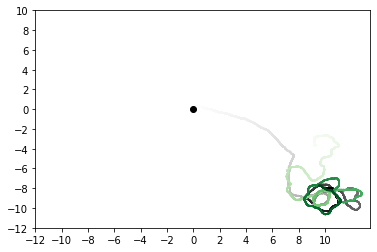

In [36]:
a = Bat()
b = Bug()
duration = 5000
batXPos = np.zeros(duration)
batYPos = np.zeros(duration)
bugXPos = np.zeros(duration)
bugYPos = np.zeros(duration)
for t in range(duration):
    a.echoLocate(b)
    a.setFlight()
    a.move()
    b.setFlight()
    b.move()
    batXPos[t] = a.xpos
    batYPos[t] = a.ypos
    bugXPos[t] = b.xpos
    bugYPos[t] = b.ypos
plt.plot(0.0,0.0,"ko")
plt.scatter(batXPos,batYPos,s=0.5,c=range(duration),cmap="Greys")
plt.scatter(bugXPos, bugYPos,s=0.5,c=range(duration),cmap="Greens")
# plt.plot(b.xpos,b.ypos,"ro")
plt.xticks((np.arange(-12, 12, step=2)))
plt.yticks((np.arange(-12, 12, step=2)))
plt.show()